In [38]:
import pandapower.networks as pn
import pandapower as pp
import math
net = pn.create_cigre_network_mv(with_der=False)
net

This pandapower network includes the following parameter tables:
   - bus (15 elements)
   - load (18 elements)
   - switch (8 elements)
   - ext_grid (1 element)
   - line (15 elements)
   - trafo (2 elements)
   - bus_geodata (15 elements)

In [39]:
#create 5 new buses
pp.create_bus(net, name='Bus CS1', vn_kv=0.4, type='b', geodata=((2,13))) 
pp.create_bus(net, name='Bus CS2', vn_kv=0.4, type='b', geodata=((1,9))) 
pp.create_bus(net, name='Bus CS3', vn_kv=0.4, type='b', geodata=((-1,3))) 
pp.create_bus(net, name='Bus CS4', vn_kv=0.4, type='b', geodata=((2,5))) 
pp.create_bus(net, name='Bus CS5', vn_kv=0.4, type='b', geodata=((12,5)))

#create transformer between those new bus and bus 2, 4, 6, 12, 14 (choose randomly) 
pp.create_transformer(net, hv_bus=2, lv_bus=pp.get_element_index(net, 'bus', 'Bus CS1'), name = 'CS1', std_type='0.63 MVA 20/0.4 kV')
pp.create_transformer(net, hv_bus=4, lv_bus=pp.get_element_index(net, 'bus', 'Bus CS2'), name = 'CS2', std_type='0.63 MVA 20/0.4 kV')
pp.create_transformer(net, hv_bus=6, lv_bus=pp.get_element_index(net, 'bus', 'Bus CS3'), name = 'CS3', std_type='0.63 MVA 20/0.4 kV')
pp.create_transformer(net, hv_bus=10, lv_bus=pp.get_element_index(net, 'bus', 'Bus CS4'), name = 'CS4', std_type='0.63 MVA 20/0.4 kV')
pp.create_transformer(net, hv_bus=14, lv_bus=pp.get_element_index(net, 'bus', 'Bus CS5'), name = 'CS5', std_type='0.63 MVA 20/0.4 kV')

net

This pandapower network includes the following parameter tables:
   - bus (20 elements)
   - load (18 elements)
   - switch (8 elements)
   - ext_grid (1 element)
   - line (15 elements)
   - trafo (7 elements)
   - bus_geodata (20 elements)

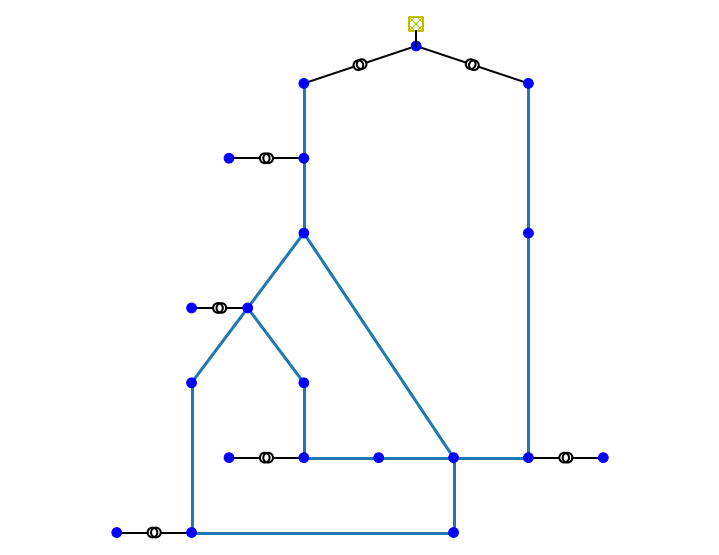

In [40]:
import pandapower.plotting as pplt
import matplotlib.pyplot as plt
ax = pplt.simple_plot(net, show_plot = False)
clc = pplt.create_line_collection(net,linewidth=3., use_bus_geodata= True)
pplt.draw_collections([clc],ax=ax)
plt.show()

In [41]:
import os
import numpy as np
import pandas as pd
import tempfile

from pandapower.timeseries import DFData
from pandapower.timeseries import OutputWriter
from pandapower.timeseries.run_time_series import run_timeseries
from pandapower.control import ConstControl

load_shape = [0.28285, 0.272295, 0.2613828, 0.261328, 0.254316, 0.259789, 0.272966, 0.30915, 0.433979, 0.542955, 0.717333, 0.851829, 0.864118, 0.854116, 0.853815, 0.852508, 0.723452, 0.490362, 0.428271, 0.361402, 0.336596, 0.328176, 0.307331, 0.297966]


In [42]:
def create_data_source(n_timesteps=24):
    profiles = pd.DataFrame()
    for _, load in net.load.iterrows() :
        profiles['p_mw_'+str(load.name)] = np.array([[l * load.p_mw]*6 for l in load_shape]).flatten()
        profiles['q_mvar_'+str(load.name)] = np.array([[l * load.q_mvar]*6 for l in load_shape]).flatten()
        
    ds = DFData(profiles)
    return profiles, ds


In [43]:
def create_controllers(net, ds):
    ConstControl(net, element='load', variable='p_mw', element_index=[i for i, load in net.load.iterrows()], data_source=ds, profile_name=['p_mw_'+str(load.name) for i, load in net.load.iterrows()])
    ConstControl(net, element='load', variable='q_mvar', element_index=[i for i, load in net.load.iterrows()], data_source=ds, profile_name=['q_mvar_'+str(load.name) for i, load in net.load.iterrows()])


In [44]:
# Read EV charging profiles from excel file, can take several minutes if many data 
#profiles_data = pd.read_excel('PEV-Profiles-L2-light.xlsx', sheet_name='PEV-Profiles-L2.csv', skiprows=2) 

In [45]:
profiles_data

,Time,Vehicle 1,Vehicle 2,Vehicle 3,Vehicle 4,Vehicle 5,Vehicle 6,Vehicle 7,Vehicle 8,Vehicle 9,...,Vehicle 339,Vehicle 340,Vehicle 341,Vehicle 342,Vehicle 343,Vehicle 344,Vehicle 345,Vehicle 346,Vehicle 347,Vehicle 348
0,2010-01-01 00:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-01-01 00:10:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010-01-01 00:20:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-01-01 00:30:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-01-01 00:40:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6043,2010-07-31 23:10:00,0,0,0,0,0,0,0,0,6600,...,0,0,0,0,0,0,0,0,0,0
6044,2010-07-31 23:20:00,0,0,0,0,0,0,0,0,6600,...,0,0,0,0,0,0,0,0,0,0
6045,2010-07-31 23:30:00,0,0,0,0,0,0,0,0,6600,...,6600,0,0,0,0,0,0,0,0,0
6046,2010-07-31 23:40:00,6600,0,0,0,0,0,0,0,6600,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Create one load on each Charging Station
def create_vehicles():
    pp.create_load(net, bus=pp.get_element_index(net, 'bus', 'Bus CS1'), p_mw=0, q_mvar=0, name="Vehicule1")
    pp.create_load(net, bus=pp.get_element_index(net, 'bus', 'Bus CS2'), p_mw=0, q_mvar=0, name="Vehicule2")
    pp.create_load(net, bus=pp.get_element_index(net, 'bus', 'Bus CS3'), p_mw=0, q_mvar=0, name="Vehicule3")
    pp.create_load(net, bus=pp.get_element_index(net, 'bus', 'Bus CS4'), p_mw=0, q_mvar=0, name="Vehicule4")
    pp.create_load(net, bus=pp.get_element_index(net, 'bus', 'Bus CS5'), p_mw=0, q_mvar=0, name="Vehicule5")


In [54]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,Line 1-2,CABLE_CIGRE_MV,1,2,2.82,0.510,0.366,10.09679,0.0,0.195,1.0,1,cs,True
1,Line 2-3,CABLE_CIGRE_MV,2,3,4.42,0.510,0.366,10.09679,0.0,0.195,1.0,1,cs,True
2,Line 3-4,CABLE_CIGRE_MV,3,4,0.61,0.501,0.716,151.17490,0.0,0.145,1.0,1,cs,True
3,Line 4-5,CABLE_CIGRE_MV,4,5,0.56,0.501,0.716,151.17490,0.0,0.145,1.0,1,cs,True
4,Line 5-6,CABLE_CIGRE_MV,5,6,1.54,0.501,0.716,151.17490,0.0,0.145,1.0,1,cs,True
5,Line 7-8,CABLE_CIGRE_MV,7,8,1.67,0.501,0.716,151.17490,0.0,0.145,1.0,1,cs,True
6,Line 8-9,CABLE_CIGRE_MV,8,9,0.32,0.501,0.716,151.17490,0.0,0.145,1.0,1,cs,True
7,Line 9-10,CABLE_CIGRE_MV,9,10,0.77,0.501,0.716,151.17490,0.0,0.145,1.0,1,cs,True
8,Line 10-11,CABLE_CIGRE_MV,10,11,0.33,0.501,0.716,151.17490,0.0,0.145,1.0,1,cs,True
9,Line 3-8,CABLE_CIGRE_MV,3,8,1.30,0.501,0.716,151.17490,0.0,0.145,1.0,1,cs,True


In [48]:
# Create data for charging profile on each Charging Station
# Sum n different profiles for each station
# The power values in the excel data are in Watt, so we divide by 1e6 to get MWatt
from cmath import acos, atan, tan

# STEP 4: Change the line types for line 0 and 1
# we can also try to double the lines
net.line['r_ohm_per_km'].loc[0] = net.line['r_ohm_per_km'].loc[10]
net.line['x_ohm_per_km'].loc[0] = net.line['x_ohm_per_km'].loc[10]
net.line['c_nf_per_km'].loc[0] = net.line['c_nf_per_km'].loc[10]
net.line['max_i_ka'].loc[0] = net.line['max_i_ka'].loc[10]

net.line['r_ohm_per_km'].loc[1] = net.line['r_ohm_per_km'].loc[10]
net.line['x_ohm_per_km'].loc[1] = net.line['x_ohm_per_km'].loc[10]
net.line['c_nf_per_km'].loc[1] = net.line['c_nf_per_km'].loc[10]
net.line['max_i_ka'].loc[1] = net.line['max_i_ka'].loc[10]


def create_data_source_vehicles(n_timesteps=144):
    # Parameters to change:

    # Step 3: max vehicles
    # n = 300 # nb of vehicles on each charging station 
    # m = 118
    # a = 348
    # b = 335
    # nb_of_vehicles = (n+m)*4 + (a+b)

    # Step 4: 115% of max
    n = 345 # can put more vehicles on the left side, but need to not use the smallest trafos on the CS, or to do some smart charging to balance the load between the CS
    m = 165
    a = 348 # can't put more on the right because the trafo is at maxi capacity (power of trafo = number of plugs in the CS = EV charging at he same time)
    b = 335
    nb_of_vehicles = (n+m)*4 + (a+b)

    d = 20 # Day of the year

    profiles = pd.DataFrame()
    # Using the same vehicles but different days for each CS:
    profiles['CS1'] = sum([profiles_data["Vehicle "+str(i)].loc[144*d:144*(d+1)-1]/1e6 for i in range(1, 1+n)]).reset_index(drop=True) + sum([profiles_data["Vehicle "+str(i)].loc[144*(d+5):144*(d+6)-1]/1e6 for i in range(1, 1+m)]).reset_index(drop=True)
    profiles['CS2'] = sum([profiles_data["Vehicle "+str(i)].loc[144*(d+1):144*(d+2)-1]/1e6 for i in range(1, 1+n)]).reset_index(drop=True) + sum([profiles_data["Vehicle "+str(i)].loc[144*(d+6):144*(d+7)-1]/1e6 for i in range(1, 1+m)]).reset_index(drop=True)
    profiles['CS3'] = sum([profiles_data["Vehicle "+str(i)].loc[144*(d+2):144*(d+3)-1]/1e6 for i in range(1, 1+n)]).reset_index(drop=True) + sum([profiles_data["Vehicle "+str(i)].loc[144*(d+7):144*(d+8)-1]/1e6 for i in range(1, 1+m)]).reset_index(drop=True)
    profiles['CS4'] = sum([profiles_data["Vehicle "+str(i)].loc[144*(d+3):144*(d+4)-1]/1e6 for i in range(1, 1+n)]).reset_index(drop=True) + sum([profiles_data["Vehicle "+str(i)].loc[144*(d+8):144*(d+9)-1]/1e6 for i in range(1, 1+m)]).reset_index(drop=True)
    profiles['CS5'] = sum([profiles_data["Vehicle "+str(i)].loc[144*(d+4):144*(d+5)-1]/1e6 for i in range(1, 1+a)]).reset_index(drop=True) + sum([profiles_data["Vehicle "+str(i)].loc[144*(d+9):144*(d+10)-1]/1e6 for i in range(1, 1+b)]).reset_index(drop=True)

    profiles = profiles.reset_index(drop=True) # To index from zero in the dataFrame
    # profiles.plot()
    ds = DFData(profiles)
    print('profiles :', profiles)
    return profiles, ds
create_data_source_vehicles()

profiles :         CS1     CS2     CS3     CS4     CS5
0    0.0660  0.1122  0.0792  0.1056  0.1188
1    0.0594  0.1056  0.0726  0.1188  0.0726
2    0.0594  0.1122  0.0858  0.1122  0.1056
3    0.0528  0.0792  0.0660  0.0990  0.0990
4    0.0594  0.0726  0.0726  0.0660  0.0924
..      ...     ...     ...     ...     ...
139  0.1056  0.2046  0.1782  0.1914  0.2112
140  0.1188  0.1914  0.1386  0.1914  0.1848
141  0.1650  0.1716  0.1254  0.1452  0.1782
142  0.1254  0.1584  0.1254  0.1386  0.1914
143  0.1386  0.1188  0.1056  0.1254  0.1716

[144 rows x 5 columns]


(        CS1     CS2     CS3     CS4     CS5
 0    0.0660  0.1122  0.0792  0.1056  0.1188
 1    0.0594  0.1056  0.0726  0.1188  0.0726
 2    0.0594  0.1122  0.0858  0.1122  0.1056
 3    0.0528  0.0792  0.0660  0.0990  0.0990
 4    0.0594  0.0726  0.0726  0.0660  0.0924
 ..      ...     ...     ...     ...     ...
 139  0.1056  0.2046  0.1782  0.1914  0.2112
 140  0.1188  0.1914  0.1386  0.1914  0.1848
 141  0.1650  0.1716  0.1254  0.1452  0.1782
 142  0.1254  0.1584  0.1254  0.1386  0.1914
 143  0.1386  0.1188  0.1056  0.1254  0.1716
 
 [144 rows x 5 columns],
 DFData with 144 rows and 5 columns: ['CS1' 'CS2' 'CS3' 'CS4' 'CS5'])

In [49]:
# Associate each profile to the parameter 'p_mw' of one load, we should also add a 'q_var' for reactive power
# 'element_index' = list of the loads by index
# 'profile_name' = which profile to associate with each load
def create_controllers_vehicles(net, ds):
    ConstControl(net, element='load', variable='p_mw', element_index=[pp.get_element_index(net, 'load', 'Vehicule'+str(i)) for i in range(1, 6)], data_source=ds, profile_name=['CS1','CS2','CS3','CS4','CS5'])


In [50]:
def create_output_writer(net, time_steps, output_dir):
    ow = OutputWriter(net, time_steps, output_path=output_dir, output_file_type=".xlsx", log_variables=list())
    # these variables are saved to the harddisk after / during the time series loop
    ow.log_variable('res_load', 'p_mw')
    ow.log_variable('res_load', 'q_mvar')
    ow.log_variable('res_bus', 'vm_pu')
    ow.log_variable('res_line', 'loading_percent')
    ow.log_variable('res_trafo', 'loading_percent')

    return ow

In [51]:
def timeseries_vehicles(output_dir):
    # create data source
    n_timesteps = 144 # 144 times 10 minutes in 24 hours
    profiles, ds = create_data_source(n_timesteps) # profiles with load shape on households loads (no vehicules in the network for now)
    # create controllers (to control P and Q values of the loads)
    create_controllers(net, ds)

    # Create new loads on the Charging Stations corresponding to the vehicules
    create_vehicles()
    profiles_vehicules, ds_vehicules = create_data_source_vehicles(n_timesteps) # Create charge profile for each station
    create_controllers_vehicles(net, ds_vehicules) # Create controllers for charging stations' load

    # time steps to be calculated.
    time_steps = range(0, n_timesteps)

    # The output writer with the desired results to be stored to files.
    ow = create_output_writer(net, time_steps, output_dir=output_dir)

    # The main time series function
    run_timeseries(net, time_steps)


In [52]:
# Function that return True if the network is overloaded, and False if it is ok
def check(dir='time_series_vehicules'):
    max_load = 100
    max_vpu = 1.1
    min_vpu = 0.9
    # Read the time series results from excel files
    loading_line = pd.read_excel(dir+'/res_line/loading_percent.xlsx', usecols="B:P") 
    vm = pd.read_excel(dir+'/res_bus/vm_pu.xlsx', usecols="B:U") 
    loading_trafo = pd.read_excel(dir+'/res_trafo/loading_percent.xlsx', usecols="B:H") 

    for i, line in loading_line.iteritems():
        for load in line :
            if float(load) > max_load :
                print('line', load)
                return True
    for i, b in vm.iteritems():
        for bus in b :
            if float(bus) > max_vpu or float(bus) < min_vpu :
                print('bus', bus)
                return True
    # For this step we consider also a critical case if a trafo is overloaded
    for i, trafo in loading_trafo.iteritems():
        for load in trafo :
            if float(load) > max_load :
                print('trafo', load)
                return True
    return False

In [53]:
output_dir = os.path.join("time_series_vehicules")
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
timeseries_vehicles(output_dir)
print("Results can be found in your local folder: {}".format(output_dir))
print("Is Network overloaded ? :", check(output_dir))


profiles :         CS1     CS2     CS3     CS4     CS5
0    0.0660  0.1122  0.0792  0.1056  0.1188
1    0.0594  0.1056  0.0726  0.1188  0.0726
2    0.0594  0.1122  0.0858  0.1122  0.1056
3    0.0528  0.0792  0.0660  0.0990  0.0990
4    0.0594  0.0726  0.0726  0.0660  0.0924
..      ...     ...     ...     ...     ...
139  0.1056  0.2046  0.1782  0.1914  0.2112
140  0.1188  0.1914  0.1386  0.1914  0.1848
141  0.1650  0.1716  0.1254  0.1452  0.1782
142  0.1254  0.1584  0.1254  0.1386  0.1914
143  0.1386  0.1188  0.1056  0.1254  0.1716

[144 rows x 5 columns]


Results can be found in your local folder: time_series_vehicules
Is Network overloaded ? : False
